## <center>Trabalho Final de Regressão</center>

<center>Nome: Jonatan Wiliam Santos de Araujo</center>

### Pacotes úteis

In [94]:
library(hnp) # envelope simulado
library(lmtest) # teste reset 
library(car) # teste de multicolinearidade (fatores de inflacao de variancia)
library(tseries) # teste de Jarque-Bera

### Coleta de dados

In [93]:
dados <- read.csv("dados/Ecommerce Customers.csv")
head(dados)

,Email,Address,Avatar,Avg..Session.Length,Time.on.App,Time.on.Website,Length.of.Membership,Yearly.Amount.Spent
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.49727,12.65565,39.57767,4.082621,587.9511
2,hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.92627,11.10946,37.26896,2.664034,392.2049
3,pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC 99414-7564",Bisque,33.00091,11.33028,37.11060,4.104543,487.5475
4,riverarebecca@gmail.com,"1414 David Throughway Port Jason, OH 22070-1220",SaddleBrown,34.30556,13.71751,36.72128,3.120179,581.8523
5,mstephens@davidson-herman.com,"14023 Rodriguez Passage Port Jacobville, PR 37242-1057",MediumAquaMarine,33.33067,12.79519,37.53665,4.446308,599.4061
6,alvareznancy@lucas.biz,"645 Martha Park Apt. 611 Jeffreychester, MN 67218-7250",FloralWhite,33.87104,12.02693,34.47688,5.493507,637.1024


In [40]:
tail(dados)

,Email,Address,Avatar,Avg..Session.Length,Time.on.App,Time.on.Website,Length.of.Membership,Yearly.Amount.Spent
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
495,kellydeborah@chan.biz,"354 Sanchez Wall Suite 884 Juliabury, VI 39735",DarkTurquoise,33.43110,13.35063,37.96597,2.768852,510.6618
496,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872 Lake Jamiefurt, UT 75292",Tan,33.23766,13.56616,36.41798,3.746573,573.8474
497,katrina56@gmail.com,"172 Owen Divide Suite 497 West Richard, CA 19320",PaleVioletRed,34.70253,11.69574,37.19027,3.576526,529.0490
498,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633 South Chadburgh, TN 56128",Cornsilk,32.64678,11.49941,38.33258,4.958264,551.6201
499,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808 Brendachester, TX 05000-5873",Teal,33.32250,12.39142,36.84009,2.336485,456.4695
500,hannahwilson@davidson.com,"49791 Rachel Heights Apt. 898 East Drewborough, OR 55919-9528",DarkMagenta,33.71598,12.41881,35.77102,2.735160,497.7786


In [84]:
sum(is.na(dados))

[1] 0

### Análise descritiva

- Variáveis:

    - **Email** (Email dos clientes do ecommerce);
    - **Address** (Endereço do cliente);
    - **Avatar** (Avatar do usuário, a imagem do avatar do cliente);
    - **Avg. Session Length** (Duração Média da Sessão do cliente no site);
    - **Time on App** (Tempo do cliente no aplicativo);
    - **Time on Website** (Tempo do cliente no Website);
    - **Length of Membership** (Tempo do cliente como membro em anos);
    - **Yearly Amount Spent** (Valor anual gasto em dólar pelo cliente).

- A variável resposta/endógena/dependente escolhida é a do valor anual gasto pelo cliente

- O objetivo é determinar o quanto um consumidor típico gasta em média e se aqueles que gastam mais são os que utilizam o site de e-commerce com mais frequência, o aplicativo, ou se o tempo de associação ao serviço influencia no volume de gastos.

In [41]:
summary(dados)

    Email             Address             Avatar          Avg..Session.Length
 Length:500         Length:500         Length:500         Min.   :29.53      
 Class :character   Class :character   Class :character   1st Qu.:32.34      
 Mode  :character   Mode  :character   Mode  :character   Median :33.08      
                                                          Mean   :33.05      
                                                          3rd Qu.:33.71      
                                                          Max.   :36.14      
  Time.on.App     Time.on.Website Length.of.Membership Yearly.Amount.Spent
 Min.   : 8.508   Min.   :33.91   Min.   :0.2699       Min.   :256.7      
 1st Qu.:11.388   1st Qu.:36.35   1st Qu.:2.9304       1st Qu.:445.0      
 Median :11.983   Median :37.07   Median :3.5340       Median :498.9      
 Mean   :12.052   Mean   :37.06   Mean   :3.5335       Mean   :499.3      
 3rd Qu.:12.754   3rd Qu.:37.72   3rd Qu.:4.1265       3rd Qu.:549.3      
 Max

In [42]:
str(dados)

'data.frame':	500 obs. of  8 variables:
 $ Email               : chr  "mstephenson@fernandez.com" "hduke@hotmail.com" "pallen@yahoo.com" "riverarebecca@gmail.com" ...
 $ Address             : chr  "835 Frank Tunnel\nWrightmouth, MI 82180-9605" "4547 Archer Common\nDiazchester, CA 06566-8576" "24645 Valerie Unions Suite 582\nCobbborough, DC 99414-7564" "1414 David Throughway\nPort Jason, OH 22070-1220" ...
 $ Avatar              : chr  "Violet" "DarkGreen" "Bisque" "SaddleBrown" ...
 $ Avg..Session.Length : num  34.5 31.9 33 34.3 33.3 ...
 $ Time.on.App         : num  12.7 11.1 11.3 13.7 12.8 ...
 $ Time.on.Website     : num  39.6 37.3 37.1 36.7 37.5 ...
 $ Length.of.Membership: num  4.08 2.66 4.1 3.12 4.45 ...
 $ Yearly.Amount.Spent : num  588 392 488 582 599 ...


In [43]:
dados_numericos <- dados[sapply(dados, is.numeric)] 

In [44]:
cor(dados_numericos)

,Avg..Session.Length,Time.on.App,Time.on.Website,Length.of.Membership,Yearly.Amount.Spent
Avg..Session.Length,1.00000000,-0.02782598,-0.034986900,0.06024739,0.355088295
Time.on.App,-0.02782598,1.00000000,0.082388273,0.02914256,0.499327770
Time.on.Website,-0.03498690,0.08238827,1.000000000,-0.04758182,-0.002640845
Length.of.Membership,0.06024739,0.02914256,-0.047581819,1.00000000,0.809083568
Yearly.Amount.Spent,0.35508829,0.49932777,-0.002640845,0.80908357,1.000000000


- Podemos observar uma possível multicolinearidade entre as covariáveis "tempo no app" e "tempo no site".
- Observamos uma forte correlação positiva entre o gasto anual do consumidor e o tempo que ele é membro do e-commerce.

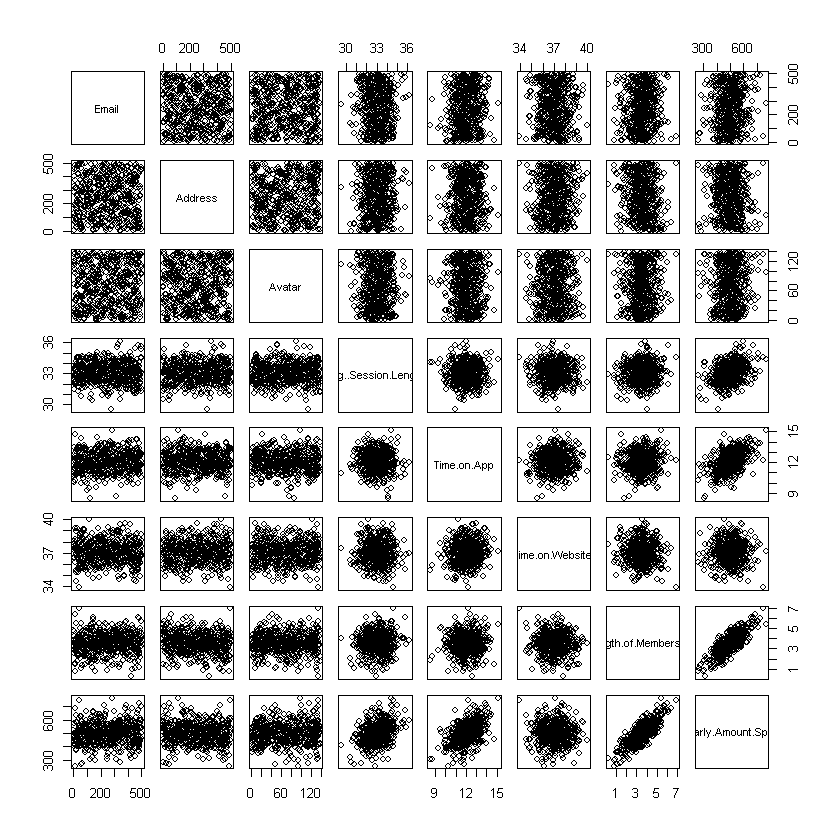

In [45]:
plot(dados)

### Ajustando o modelo

In [46]:
fit <- lm(Yearly.Amount.Spent~Avg..Session.Length+Time.on.App+Time.on.Website+Length.of.Membership,data=dados)

In [47]:
summary(fit)


Call:
lm(formula = Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + 
    Time.on.Website + Length.of.Membership, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.4059  -6.2191  -0.1364   6.6048  30.3085 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1051.5943    22.9925 -45.736   <2e-16 ***
Avg..Session.Length     25.7343     0.4510  57.057   <2e-16 ***
Time.on.App             38.7092     0.4510  85.828   <2e-16 ***
Time.on.Website          0.4367     0.4441   0.983    0.326    
Length.of.Membership    61.5773     0.4483 137.346   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.973 on 495 degrees of freedom
Multiple R-squared:  0.9843,	Adjusted R-squared:  0.9842 
F-statistic:  7766 on 4 and 495 DF,  p-value: < 2.2e-16


- Pelo p-valor dos testes T podemos ver que seria só a covariável tempo no site com parâmetro associado à covariável igual a zero (não significativa).
- Porém não convém fazer essa análise antes de se fazer a checagem do modelo.

Modelo o step(.) sugeriria:

In [48]:
step(fit)

Start:  AIC=2304.88
Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + Time.on.Website + 
    Length.of.Membership

                       Df Sum of Sq     RSS    AIC
- Time.on.Website       1        96   49332 2303.9
<none>                                49236 2304.9
- Avg..Session.Length   1    323812  373047 3315.4
- Time.on.App           1    732713  781948 3685.5
- Length.of.Membership  1   1876320 1925555 4136.1

Step:  AIC=2303.86
Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + Length.of.Membership

                       Df Sum of Sq     RSS    AIC
<none>                                49332 2303.9
- Avg..Session.Length   1    323767  373099 3313.5
- Time.on.App           1    739204  788535 3687.7
- Length.of.Membership  1   1879405 1928736 4134.9



Call:
lm(formula = Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + 
    Length.of.Membership, data = dados)

Coefficients:
         (Intercept)   Avg..Session.Length           Time.on.App  
            -1035.34                 25.72                 38.75  
Length.of.Membership  
               61.56  


A função considerou a duração média da seção do cliente, tempo no app e tempo como membro no modelo e retirou o tempo no site.

In [49]:
# ajustando o modelo sugerido
fit <- lm(Yearly.Amount.Spent~Avg..Session.Length+Time.on.App+Length.of.Membership,data=dados)

In [50]:
summary(fit)


Call:
lm(formula = Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + 
    Length.of.Membership, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.628  -6.378  -0.135   6.351  30.169 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1035.3396    15.9829  -64.78   <2e-16 ***
Avg..Session.Length     25.7210     0.4508   57.05   <2e-16 ***
Time.on.App             38.7460     0.4494   86.21   <2e-16 ***
Length.of.Membership    61.5560     0.4478  137.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.973 on 496 degrees of freedom
Multiple R-squared:  0.9843,	Adjusted R-squared:  0.9842 
F-statistic: 1.036e+04 on 3 and 496 DF,  p-value: < 2.2e-16


O R ajustado (critério de seleção) foi praticamente o mesmo, então tempo não faz diferença no modelo.
Mas vale lembrar que antes dessa análise se faz necessário os testes das suposições.  

### Análise de influência

In [51]:
n <- dim(dados)[1] # tamanho da amostra

In [ ]:
influence.measures(fit)

In [ ]:
# alavancagem
hatvalues(fit)

In [54]:
h_bar <- fit$rank / n

In [55]:
limite  <- 2*h_bar

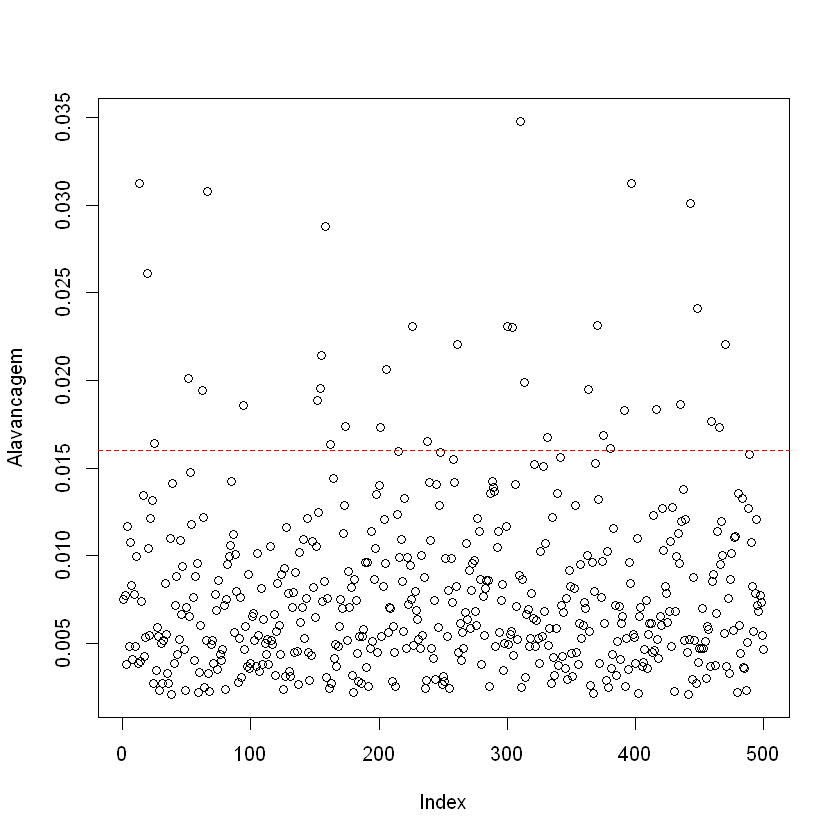

In [56]:
abline(plot(hatvalues(fit),ylab="Alavancagem"),
       col='red', h=limite, lty=2)

In [ ]:
# DFFIT (o que cada observação influencia no y chapéu)
dffits(fit)

In [58]:
limite <- 2*sqrt(fit$rank / n)

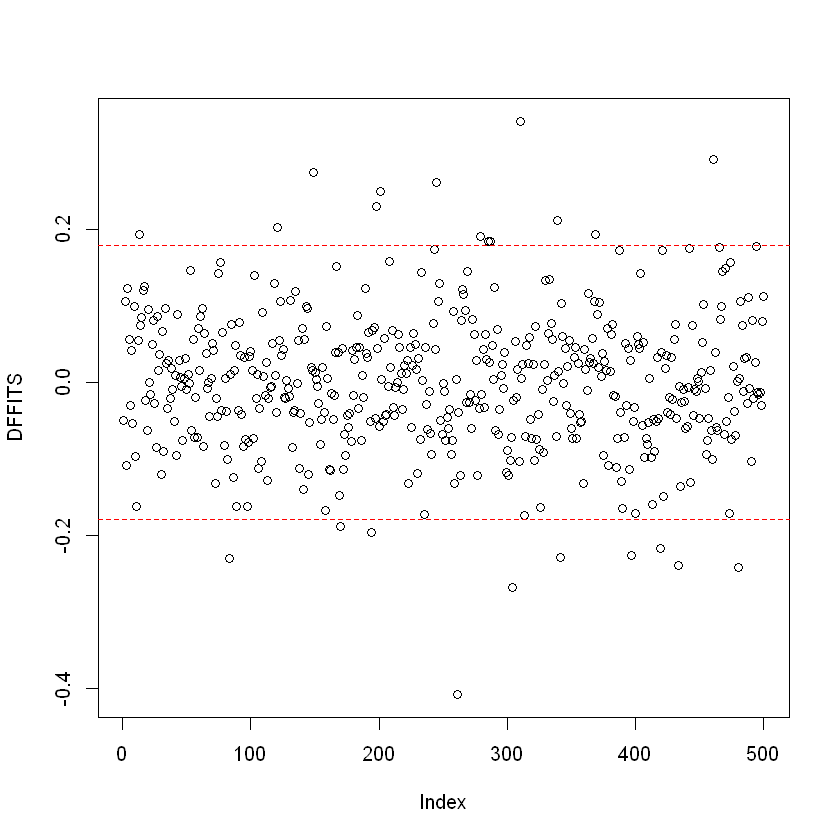

In [59]:
abline(plot(dffits(fit), ylab='DFFITS'),
       col='red', h=c(-limite, limite), lty=2)

In [ ]:
# DFBETA
dfbetas(fit)

dfb1 <- dfbetas(fit)[,1]
dfb2 <- dfbetas(fit)[,2]
dfb3 <- dfbetas(fit)[,3]

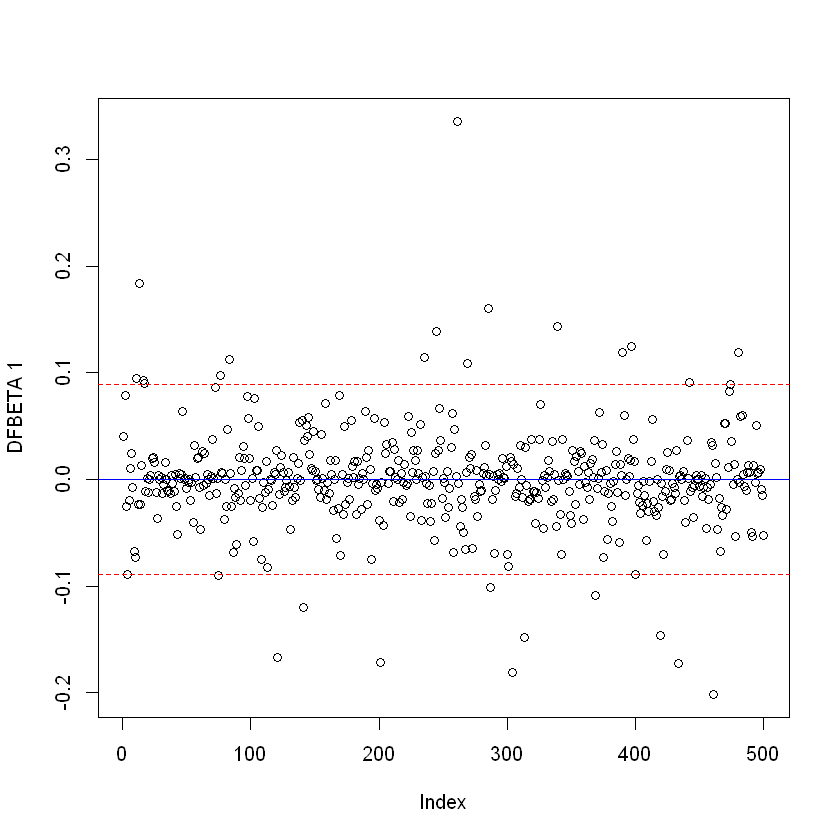

In [61]:
limite <- 2/sqrt(n)
abline(plot(dfb1,ylab="DFBETA 1"),
       col=c("red","blue","red"), h=c(-limite,0,limite), lty=c(2,1,2))

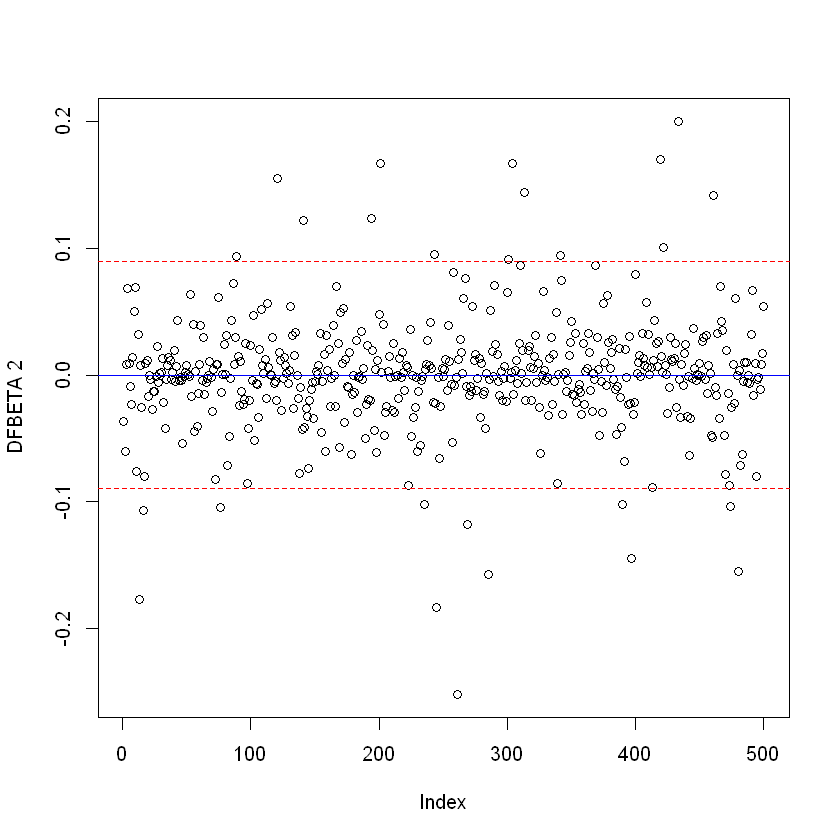

In [86]:
limite <- 2/sqrt(n)
abline(plot(dfb2,ylab="DFBETA 2"),
       col=c("red","blue","red"), h=c(-limite,0,limite), lty=c(2,1,2))

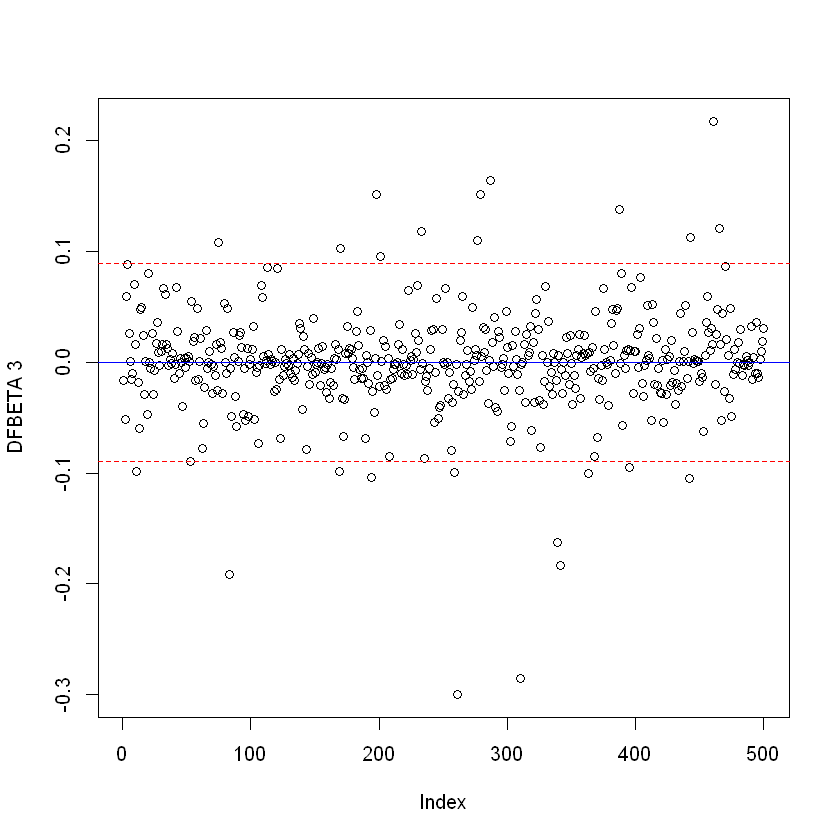

In [87]:
limite <- 2/sqrt(n)
abline(plot(dfb3,ylab="DFBETA 3"),
       col=c("red","blue","red"), h=c(-limite,0,limite), lty=c(2,1,2))

In [ ]:
# distância de cook
cooks.distance(fit)

In [65]:
limite <- 4/(n-fit$rank)

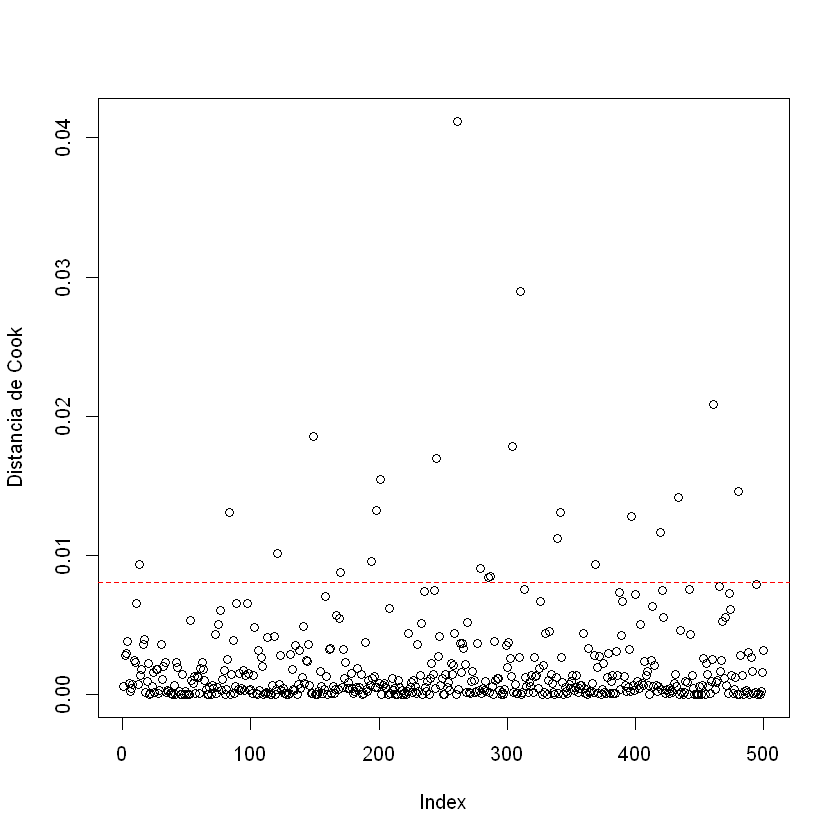

In [66]:
abline(plot(cooks.distance(fit), ylab="Distancia de Cook"),
       col='red', h=limite, lty=2)

In [67]:
# residuo
residuo <- rstudent(fit)

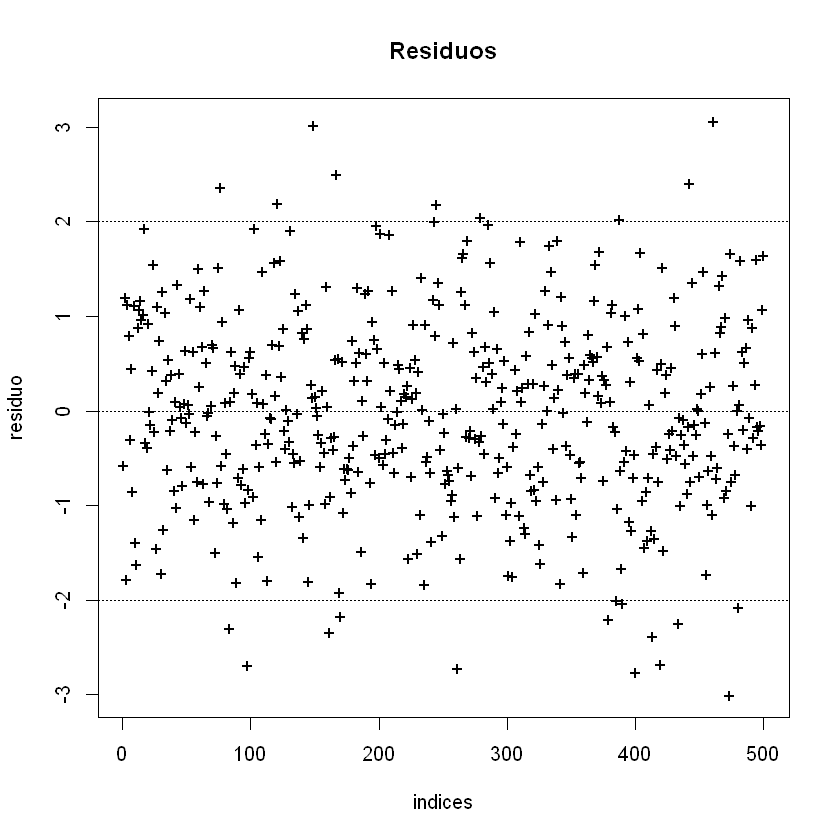

In [68]:
plot(residuo, type='p', pch='+', main='Residuos', xlab='indices')
abline(h=c(-2,0,2), lty=3)

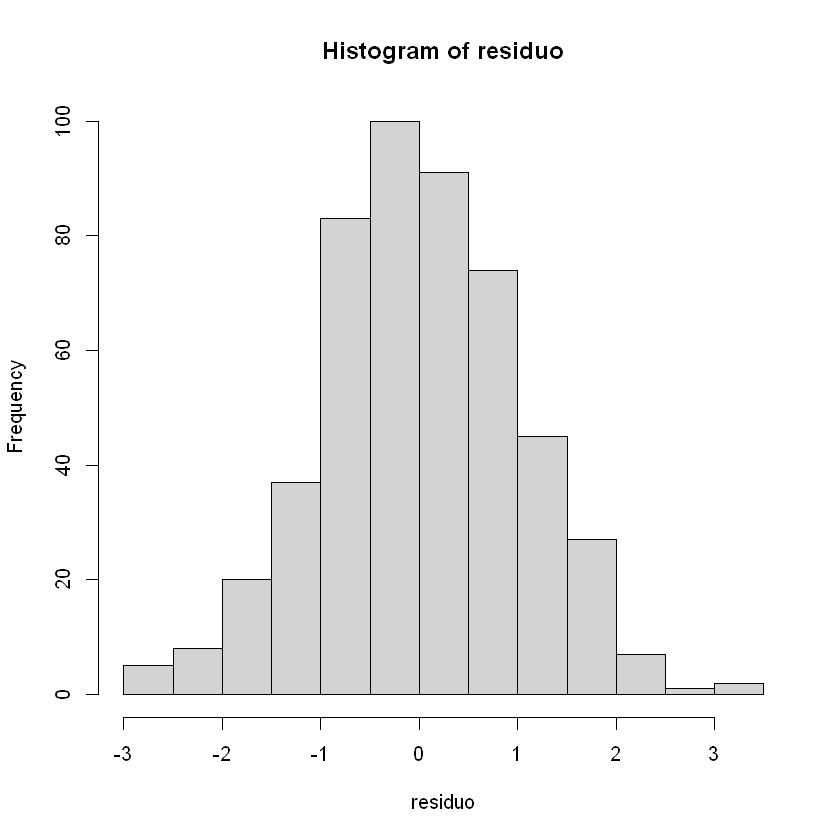

In [69]:
hist(residuo)

Acima podemos observar que a distribuição dos resíduos se parece com uma normal

Gaussian model (lm object) 


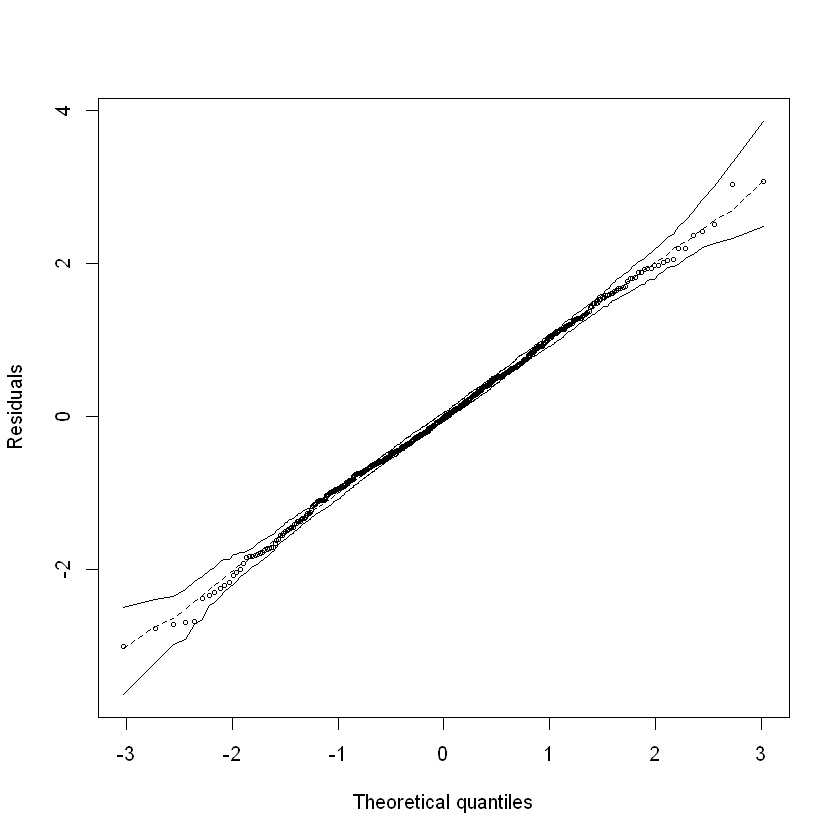

In [70]:
# envelope simulado baseado nos residuos studentizados
hnp(fit,resid.type ="student", halfnormal= F)

Acima no gráfico do envelope dos resíduos, temos eles "studentizados" e ordenados. Esse envelope são bandas de confiança e esperamos que pelo menos 90% dos resíduos estejam entre essas bandas. Essas bandas são feitas através de simulações de Monte Carlo.

Esse envelope indica, principalmente, que a suposição distribucional está correta. Ou seja, a distribuição normal é correta para modelar esses dados.

### Testando as suposições do modelo

- Suposições:
    - [S0] O modelo está corretamente especificado;
    - [S1] A média dos erros é zero;
    - [S2] Homoscedasticidade dos erros;
    - [S3] Não autocorrelação;
    - [S4] Ausência de multicolinearidade;
    - [S5] Normalidade dos erros.

In [71]:
# teste para [s0]
## H0: O modelo esta corretamente especificado
resettest(fit)


	RESET test

data:  fit
RESET = 0.15103, df1 = 2, df2 = 494, p-value = 0.8599


A hipótese nula não foi rejeitada

In [72]:
# teste para [s1]
## H0: Media dos erros e igual a zero
t.test(residuo,mu=0,alternative = "two.sided")


	One Sample t-test

data:  residuo
t = -0.0023141, df = 499, p-value = 0.9982
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.08823076  0.08802317
sample estimates:
    mean of x 
-0.0001037956 


A hipótese nula não foi rejeitada

In [73]:
# teste para [s2] (teste de Bressch-Pagan(Koenker) de heteroscedasticidade)
## H0: Erros sao homoscedasticos
bptest(fit, studentize = TRUE)


	studentized Breusch-Pagan test

data:  fit
BP = 5.7894, df = 3, p-value = 0.1223


A hipótese nula não foi rejeitada

In [74]:
# teste para [s3] (teste de Durbin-Watson de autocorrelacao)
## H0: Nao ha autocorrelacao
dwtest(fit)


	Durbin-Watson test

data:  fit
DW = 1.8885, p-value = 0.1068
alternative hypothesis: true autocorrelation is greater than 0


A hipótese nula não foi rejeitada

In [75]:
# teste para [s4] (usa fatores de inflacao de variancia para detectar multicolinearidade)
## regra de bolso: vif > 10 indica multicolinearidade. vif = 1 seria o ideal
vif(fit)

Avg..Session.Length          Time.on.App Length.of.Membership 
            1.004526             1.001731             1.004601

Não apresentou multicolinearidade entre as covariáveis. Uma das possíveis já tinha tirado antes (tempo no site x tempo no app)

In [76]:
# teste [s5] (teste Jarque-Bera de normalidade)
## H0: Os erros possuem distribuicao normal
jarque.bera.test(residuo) 


	Jarque Bera Test

data:  residuo
X-squared = 0.20113, df = 2, p-value = 0.9043


A hipótese nula não foi rejeitada

**Todas as suposições estão corretas.**

### Interpretação do modelo

In [77]:
summary(fit)


Call:
lm(formula = Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + 
    Length.of.Membership, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.628  -6.378  -0.135   6.351  30.169 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1035.3396    15.9829  -64.78   <2e-16 ***
Avg..Session.Length     25.7210     0.4508   57.05   <2e-16 ***
Time.on.App             38.7460     0.4494   86.21   <2e-16 ***
Length.of.Membership    61.5560     0.4478  137.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.973 on 496 degrees of freedom
Multiple R-squared:  0.9843,	Adjusted R-squared:  0.9842 
F-statistic: 1.036e+04 on 3 and 496 DF,  p-value: < 2.2e-16


meu modelo explica 98,43% da variabilidade de y, o resto é aleatoriedade

$\mu = \beta_0 + \beta_1 X Avg..Session.Length + \beta_2 X Time.on.App + \beta_3 X Length.of.Membership$

- intercepto ou $\beta_0$: - 1.035,3396, um gasto negativo sinalizando essa perda média quando não há clientes.
- $\beta_1$ X **Avg..Session.Length**: cada minuto há mais na seção indica um gasto de 25,7210 dólares em média do cliente.
- $\beta_2$ X **Time.on.App**: cada minuto no app indica um gasto médio de 38,7460 do cliente.
- $\beta_3$ X **Length.of.Membership**: o cliente com 1 ano de membro tem um gasto médio há mais de 61,5560

### Predição

In [79]:
m1 <- mean(dados$Avg..Session.Length)
m2 <- mean(dados$Time.on.App)
m3 <- mean(dados$Length.of.Membership)
cat(m1, m2, m3, "\n")

33.05319 12.05249 3.533462 


In [80]:
# predicao com novos dados
novos_dados <- data.frame(cbind(
    Avg..Session.Length = 33.05319, Time.on.App = 12.05249, Length.of.Membership = 3.533462)
)
predict(fit, newdata=novos_dados)

1 
499.3141

Na previsão acima, podemos observar que, se um cliente apresenta um tempo médio de sessão, tempo médio no aplicativo e possui três anos e meio como membro, ele tende a gastar aproximadamente 500 dólares por ano com o e-commerce.

### Retirando uma possível influência

In [81]:
outlier_cooks <- which(abs(cooks.distance(fit))>0.04)
outlier_cooks

261 
261

Nos gráficos acima, tanto dos DFBETAs quanto da Distância de Cook, identifiquei um outlier significativo na observação 261. Pretendo remover essa observação para avaliar se ela realmente influencia os valores dos coeficientes do modelo.

In [95]:
dados_261 <- dados[-261, ]

In [96]:
fit <- lm(Yearly.Amount.Spent~Avg..Session.Length+Time.on.App+Length.of.Membership,data=dados_261)

In [97]:
summary(fit)


Call:
lm(formula = Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + 
    Length.of.Membership, data = dados_261)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.7756  -6.3414  -0.2313   6.3695  29.7970 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1040.6775    16.0018  -65.03   <2e-16 ***
Avg..Session.Length     25.8342     0.4499   57.43   <2e-16 ***
Time.on.App             38.8799     0.4493   86.54   <2e-16 ***
Length.of.Membership    61.5671     0.4450  138.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.909 on 495 degrees of freedom
Multiple R-squared:  0.9844,	Adjusted R-squared:  0.9843 
F-statistic: 1.042e+04 on 3 and 495 DF,  p-value: < 2.2e-16


Notamos que houve uma diferença de 5 dólares no intercepto, porém não foi algo muito significativo nos demais.